# Student Performance

### Step 1: Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

### Step 2: Read Data

In [2]:
# File paths
extracted_folder = 'Student_Performance/'  # Path where files were extracted
student_folder = os.path.join(extracted_folder, 'student')

# Full paths to the CSV files
student_mat_path = os.path.join(student_folder, 'student-mat.csv')
student_por_path = os.path.join(student_folder, 'student-por.csv')

# Load the CSV files into DataFrames
student_mat_df = pd.read_csv(student_mat_path, sep=';')
student_por_df = pd.read_csv(student_por_path, sep=';')

# Display the first few rows of each dataset to confirm successful loading
print("\nFirst few rows of student-mat.csv:")
print(student_mat_df.head())

print("\nFirst few rows of student-por.csv:")
print(student_por_df.head())

# Check for missing values
print("\nMissing values in student-mat dataset:")
print(student_mat_df.isnull().sum())

print("\nMissing values in student-por dataset:")
print(student_por_df.isnull().sum())


First few rows of student-mat.csv:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

First few rows of student-por.csv:
  school sex  ag

### Step 3: Inspect and Clean Data

In [4]:
# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
student_mat_df[student_mat_df.select_dtypes(include=[np.number]).columns] = imputer_num.fit_transform(
    student_mat_df.select_dtypes(include=[np.number])
)
student_por_df[student_por_df.select_dtypes(include=[np.number]).columns] = imputer_num.fit_transform(
    student_por_df.select_dtypes(include=[np.number])
)

imputer_cat = SimpleImputer(strategy='most_frequent')
student_mat_df[student_mat_df.select_dtypes(include=[object]).columns] = imputer_cat.fit_transform(
    student_mat_df.select_dtypes(include=[object])
)
student_por_df[student_por_df.select_dtypes(include=[object]).columns] = imputer_cat.fit_transform(
    student_por_df.select_dtypes(include=[object])
)

# Inspect data after imputations
print("\nData after imputations - student-mat:")
print(student_mat_df.head())

print("\nData after imputations - student-por:")
print(student_por_df.head())


Data after imputations - student-mat:
  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0  ...    4.0      3.0    4.0   1.0   1.0    3.0      6.0   5.0   6.0   6.0  
1  ...    5.0      3.0    3.0   1.0   1.0    3.0      4.0   5.0   5.0   6.0  
2  ...    4.0      3.0    2.0   2.0   3.0    3.0     10.0   7.0   8.0  10.0  
3  ...    3.0      2.0    2.0   1.0   1.0    5.0      2.0  15.0  14.0  15.0  
4  ...    4.0      3.0    2.0   1.0   2.0    5.0      4.0   6.0  10.0  10.0  

[5 rows x 33 columns]

Data a

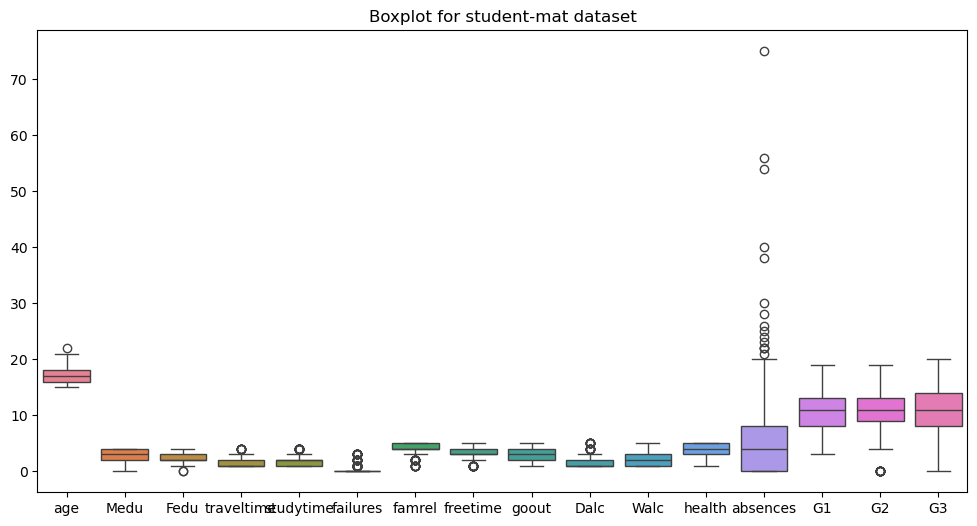


Data after outlier removal - student-mat:
              age        Medu        Fedu  traveltime   studytime  failures  \
count  232.000000  232.000000  232.000000  232.000000  232.000000     232.0   
mean    16.478448    2.862069    2.693966    1.344828    1.956897       0.0   
std      1.112488    1.088281    1.055334    0.582627    0.688712       0.0   
min     15.000000    0.000000    1.000000    1.000000    1.000000       0.0   
25%     16.000000    2.000000    2.000000    1.000000    1.000000       0.0   
50%     16.000000    3.000000    3.000000    1.000000    2.000000       0.0   
75%     17.000000    4.000000    4.000000    2.000000    2.000000       0.0   
max     20.000000    4.000000    4.000000    3.000000    3.000000       0.0   

           famrel    freetime       goout        Dalc        Walc      health  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     4.116379    3.301724    2.982759    1.280172    2.103448    3.521552   
st

In [5]:
# Visualizing outliers using boxplots for numeric columns only
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_mat_df[numeric_columns])
plt.title("Boxplot for student-mat dataset")
plt.show()

# Remove outliers using IQR (Interquartile Range method)
Q1 = student_mat_df[numeric_columns].quantile(0.25)
Q3 = student_mat_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
student_mat_df = student_mat_df[~((student_mat_df[numeric_columns] < (Q1 - 1.5 * IQR)) | \
                                  (student_mat_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1_por = student_por_df[numeric_columns].quantile(0.25)
Q3_por = student_por_df[numeric_columns].quantile(0.75)
IQR_por = Q3_por - Q1_por
student_por_df = student_por_df[~((student_por_df[numeric_columns] < (Q1_por - 1.5 * IQR_por)) | \
                                  (student_por_df[numeric_columns] > (Q3_por + 1.5 * IQR_por))).any(axis=1)]

# Inspect data after outlier removal
print("\nData after outlier removal - student-mat:")
print(student_mat_df.describe())

print("\nData after outlier removal - student-por:")
print(student_por_df.describe())

### Step 4: Preprocess and Save Data

In [6]:
# Normalize numeric columns
scaler = StandardScaler()
student_mat_df[numeric_columns] = scaler.fit_transform(student_mat_df[numeric_columns])
student_por_df[numeric_columns] = scaler.fit_transform(student_por_df[numeric_columns])

# Inspect normalized data
print("\nData after normalization - student-mat:")
print(student_mat_df.head())

print("\nData after normalization - student-por:")
print(student_por_df.head())

# Merge the datasets
merged_df = pd.merge(student_mat_df, student_por_df, how='outer', on=['school', 'sex', 'age'])

# Save the cleaned data to new CSV files
student_mat_df.to_csv(os.path.join(extracted_folder, 'student-mat-cleaned.csv'), index=False)
student_por_df.to_csv(os.path.join(extracted_folder, 'student-por-cleaned.csv'), index=False)


Data after normalization - student-mat:
  school sex       age address famsize Pstatus      Medu      Fedu      Mjob  \
0     GP   F  1.370659       U     GT3       A  1.047883  1.240231   at_home   
1     GP   F  0.469829       U     GT3       T -1.714718 -1.608617   at_home   
3     GP   F -1.331830       U     GT3       T  1.047883 -0.659001    health   
4     GP   F -0.431001       U     GT3       T  0.127016  0.290615     other   
5     GP   M -0.431001       U     LE3       T  1.047883  0.290615  services   

       Fjob  ...    famrel  freetime     goout      Dalc      Walc    health  \
0   teacher  ... -0.167605 -0.355756  0.992052 -0.500192 -0.977698 -0.366473   
1     other  ...  1.272556 -0.355756  0.016814 -0.500192 -0.977698 -0.366473   
3  services  ... -1.607766 -1.534835 -0.958423 -0.500192 -0.977698  1.038846   
4     other  ... -0.167605 -0.355756 -0.958423 -0.500192 -0.091659  1.038846   
5     other  ...  1.272556  0.823322 -0.958423 -0.500192 -0.091659  1.038846  

### Step 5: Visualization

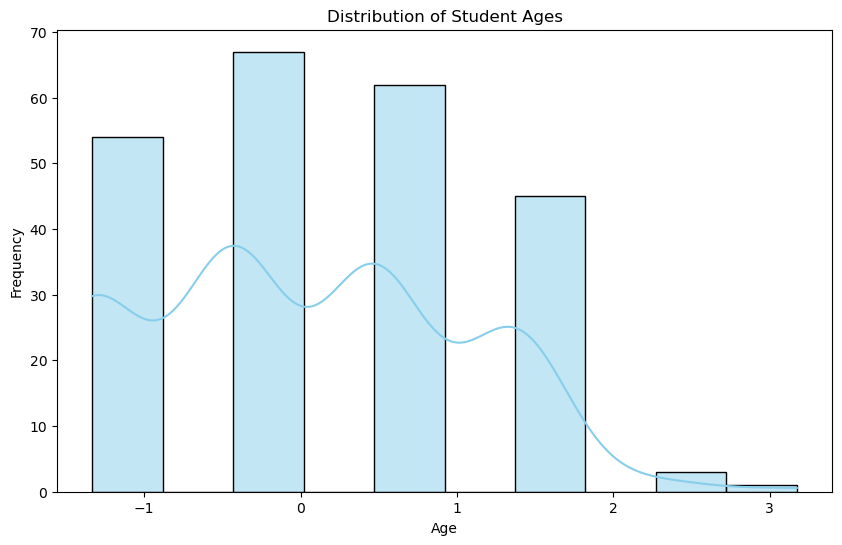

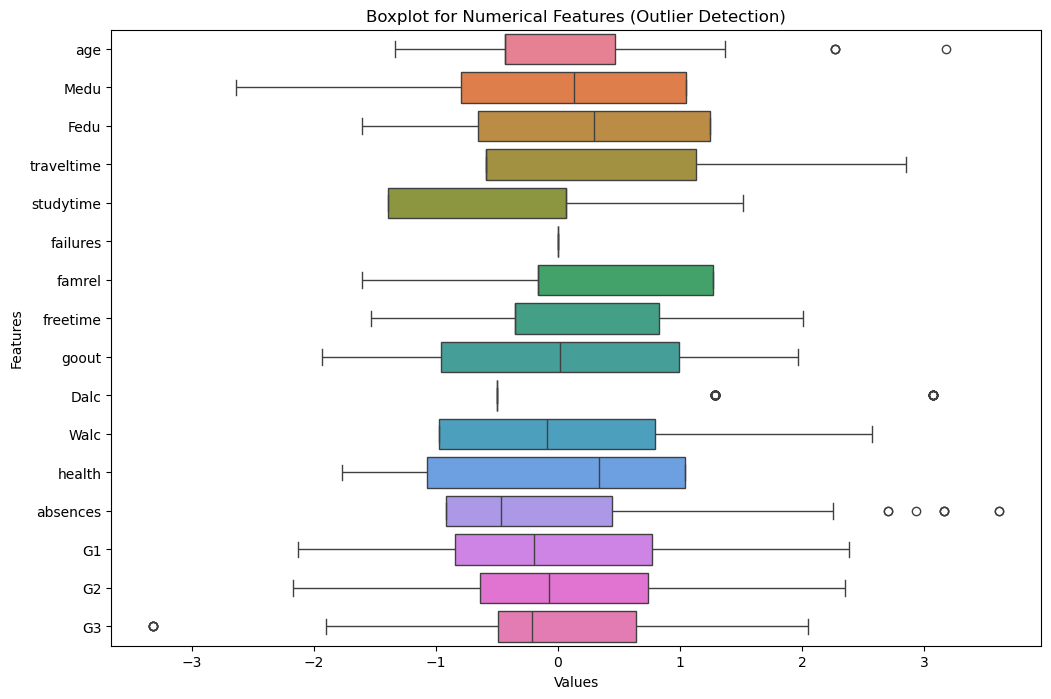

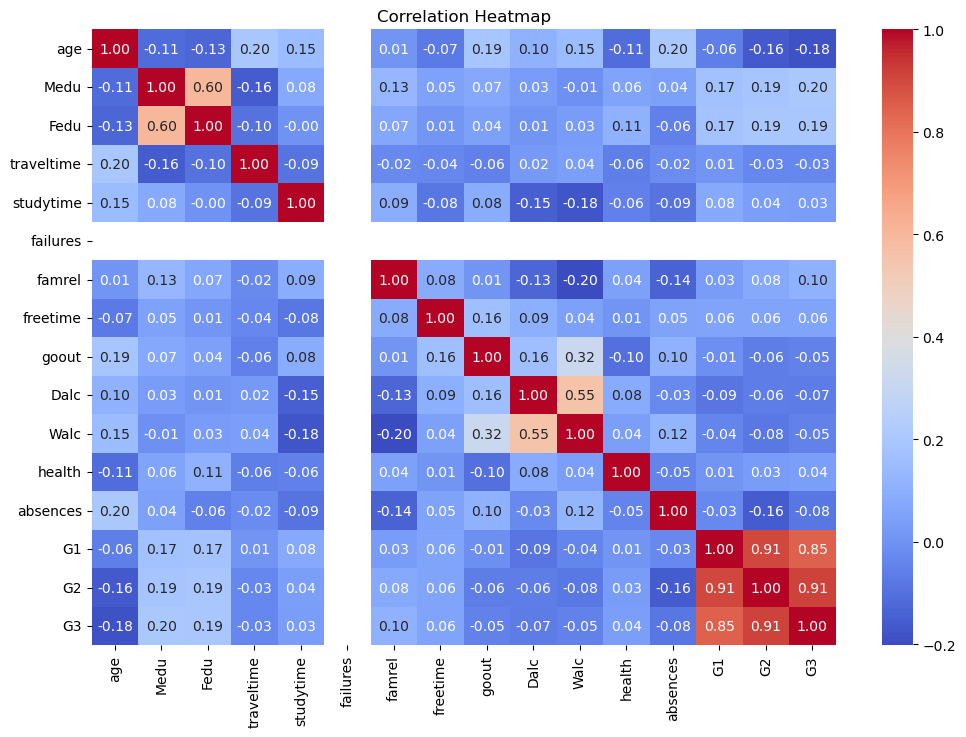

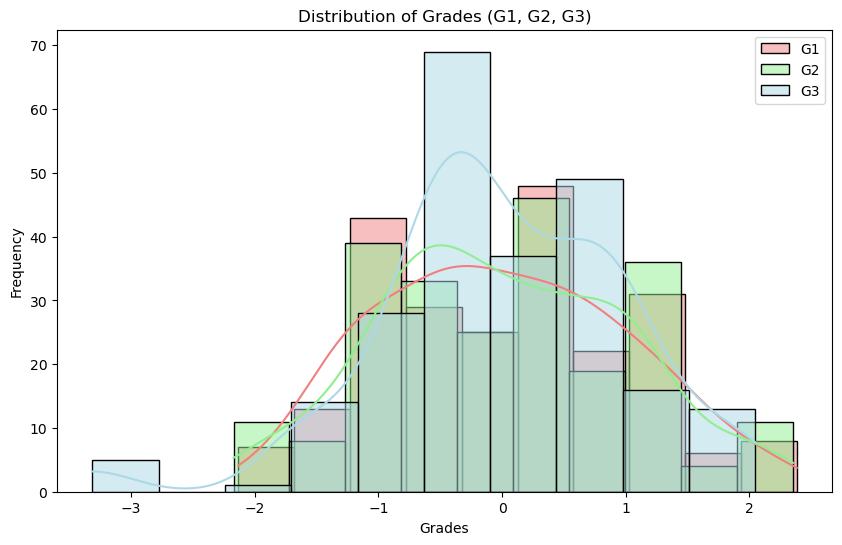

C:\Users\milto\AppData\Local\Temp\ipykernel_22604\326188287.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')


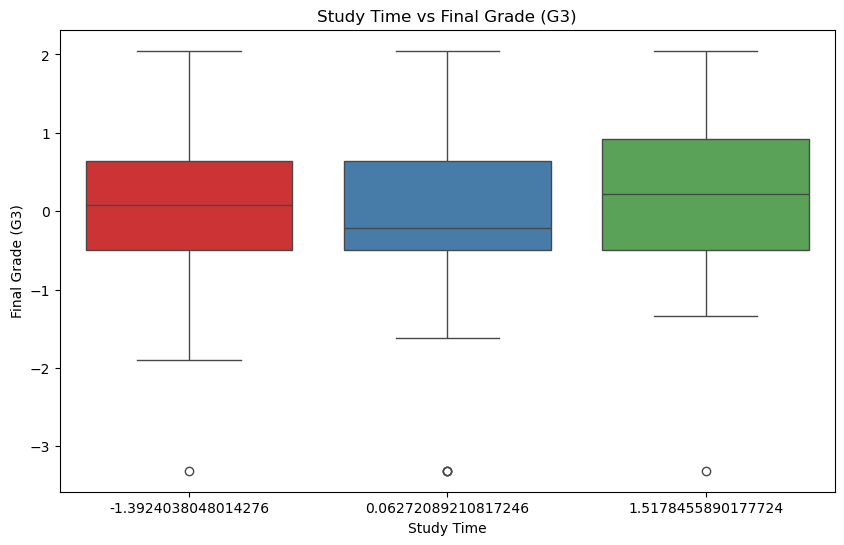

ANOVA p-value for study time and G3: 0.10548403738435622


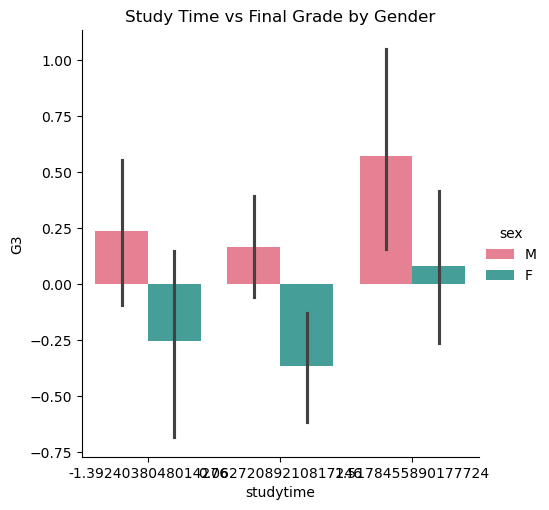

In [7]:
# Visualizations
# Distribution of student ages
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['age'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=student_mat_df[numeric_columns], orient='h')
plt.title('Boxplot for Numerical Features (Outlier Detection)')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = student_mat_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of grades (G1, G2, G3)
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['G1'], kde=True, color='lightcoral', label='G1', bins=10)
sns.histplot(student_mat_df['G2'], kde=True, color='lightgreen', label='G2', bins=10)
sns.histplot(student_mat_df['G3'], kde=True, color='lightblue', label='G3', bins=10)
plt.legend()
plt.title('Distribution of Grades (G1, G2, G3)')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

# Study time vs Final grade (G3)
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# Analyzing the effect of study time on G3 using ANOVA
studytime_groups = [group['G3'] for _, group in student_mat_df.groupby('studytime')]
anova_result = f_oneway(*studytime_groups)
print(f"ANOVA p-value for study time and G3: {anova_result.pvalue}")

# Additional grouped visualization
sns.catplot(x='studytime', y='G3', hue='sex', kind='bar', data=student_mat_df, palette='husl')
plt.title('Study Time vs Final Grade by Gender')
plt.show()